_Name: Radhika Kolhekar_


---
**The Sparks Foundation: Task #2 Predicition using Unsupervised ML**

**Prediciting the optimum no. of cluster (Iris dataset)**

K-means clustering

In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [ ]:
iris =   pd.read_csv("Iris.csv") #Iris.csv is now a pandas dataframe
print(iris.head()) #prints first 5 values

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Scatter plot 

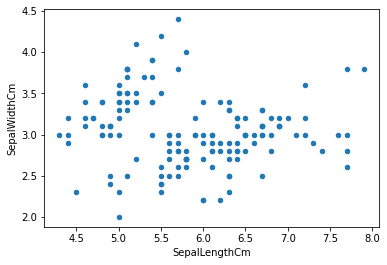

In [ ]:
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.show()

How to find optimum no. of clusters for K Means? How to derermine the value of K?

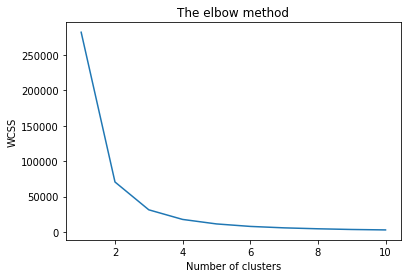

In [ ]:
# finding optimum no. of clusters for k-means classification

x = iris.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


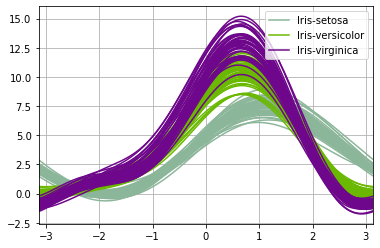

In [ ]:
from pandas.plotting import andrews_curves
andrews_curves(iris.drop("Id", axis=1), "Species")
plt.show()

Applying K means clustering to the dataset and creating a K means classifier

In [ ]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) #Applying Kmeans classifier
y_kmeans = kmeans.fit_predict(x)
print(kmeans.cluster_centers_) #display cluster centers


[[125.5     6.588   2.974   5.552]
 [ 25.5     5.006   3.418   1.464]
 [ 75.5     5.936   2.77    4.26 ]]


Visualizing the clusters on first 2 columns


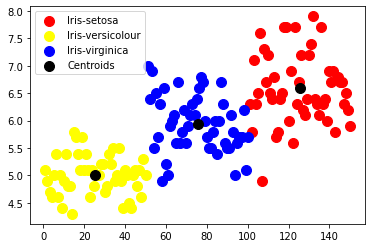

In [ ]:
plt.scatter(x[y_kmeans   == 0, 0], x[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans   == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans   == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'blue', label = 'Iris-virginica')   #Visualising the clusters - On the first two columns
plt.scatter(kmeans.cluster_centers_[:,   0], kmeans.cluster_centers_[:,1],s = 100, c = 'black', label = 'Centroids')   #plotting the centroids of the clusters
plt.legend()
plt.show()
